In [2]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import keras

In [3]:
import tensorflow as tf

In [4]:
datapath = "../../../../deeplearning/TensorFlow2.0_ResNet/dataset/"
print(os.path.exists(datapath))
image_dims = (224, 224)
batch_size=16
original_dir = '../../../../datasets/covidDataset'
print(os.path.exists(original_dir))

True
True


In [5]:
import tensorflow as tf

In [25]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            original_dir,
            labels='inferred',
            label_mode='categorical',
            class_names=('COVID', 'non-COVID'),
            color_mode='rgb',
            batch_size=batch_size,
            image_size=image_dims,
            shuffle=True,
            seed=77,
            validation_split=0.15,
            subset='training',
            crop_to_aspect_ratio=False
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            original_dir,
            labels='inferred',
            label_mode='categorical',
            class_names=('COVID', 'non-COVID'),
            color_mode='rgb',
            batch_size=batch_size,
            image_size=image_dims,
            shuffle=True,
            seed=77,
            validation_split=0.15,
            subset='validation',
            crop_to_aspect_ratio=False
)


Found 2481 files belonging to 2 classes.
Using 2109 files for training.
Found 2481 files belonging to 2 classes.
Using 372 files for validation.


In [9]:
import matplotlib.pyplot as plt

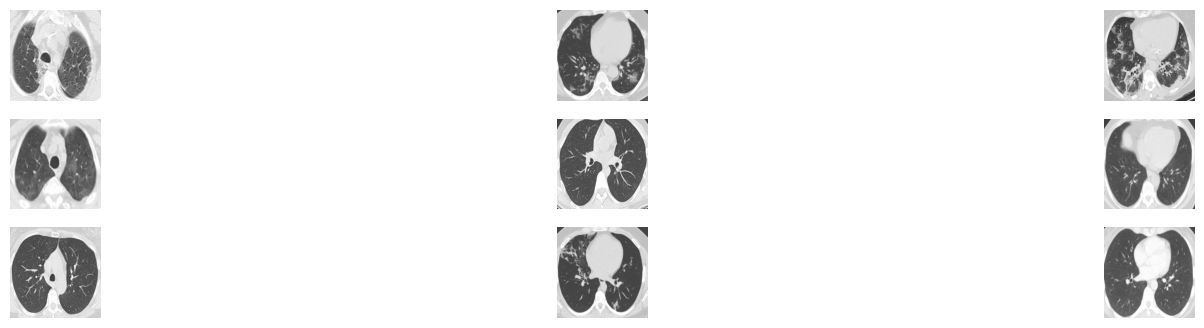

In [26]:
class_names = train_dataset.class_names
plt.figure(figsize=(20, 4))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
#         plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()



In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(os.path.join(datapath, "train"),
                                             target_size = image_dims,
                                            batch_size = batch_size,
                                             class_mode = 'categorical',
                                            color_mode = 'rgb',
                                                   shuffle=True)
test_generator = test_datagen.flow_from_directory(os.path.join(datapath, "test"), 
                                                             target_size = image_dims,
                                                              batch_size = batch_size,
                                                             class_mode = 'categorical', 
                                                             color_mode = 'rgb')
validation_generator = validation_datagen.flow_from_directory(os.path.join(datapath, "valid"), 
                                                     target_size = image_dims,
                                                      batch_size = batch_size,
                                                     class_mode = 'categorical', 
                                                     color_mode = 'rgb',
                                                             shuffle=True)



Found 1488 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import tensorflow as tf

In [6]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import numpy as np

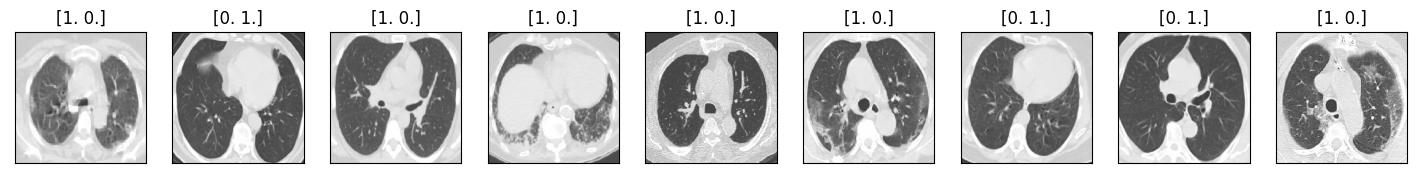

In [152]:
n = 10
plt.figure(figsize=(20, 4))
xtrain, ytrain = next(train_generator)
# samples = iter(enumerate(train_generator), n)
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain[i])
    ax.title.set_text(ytrain[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
import keras

In [17]:
vgg_model = tf.keras.applications.VGG19(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
vgg_model.summary()

vgg_model.trainable=False 
x = vgg_model.layers[-1].output #
x = keras.layers.Flatten()(x)
# x = keras.layers.Dense(1000, activation='relu')(x)
# x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(200, activation='relu')(x)
output = keras.layers.Dense(2, activation='softmax')(x)

vgg = keras.Model(vgg_model.input, output)
vgg._name = 'vgg19'
vgg.summary()



Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
vgg.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
           loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
           metrics=[keras.metrics.BinaryAccuracy()])

In [19]:
history = vgg.fit(train_generator,
       epochs=5 ,
       validation_data = validation_generator)

Epoch 1/5
47/47 [==============================] - 156s 3s/step - loss: 0.7594 - binary_accuracy: 0.7883 - val_loss: 0.2500 - val_binary_accuracy: 0.9217
Epoch 2/5
47/47 [==============================] - 114s 2s/step - loss: 0.2626 - binary_accuracy: 0.8837 - val_loss: 0.1803 - val_binary_accuracy: 0.9538
Epoch 3/5
47/47 [==============================] - 115s 2s/step - loss: 0.1687 - binary_accuracy: 0.9489 - val_loss: 0.2075 - val_binary_accuracy: 0.9056
Epoch 4/5
47/47 [==============================] - 115s 2s/step - loss: 0.1373 - binary_accuracy: 0.9523 - val_loss: 0.1248 - val_binary_accuracy: 0.9679
Epoch 5/5
47/47 [==============================] - 115s 2s/step - loss: 0.0993 - binary_accuracy: 0.9724 - val_loss: 0.0993 - val_binary_accuracy: 0.9779


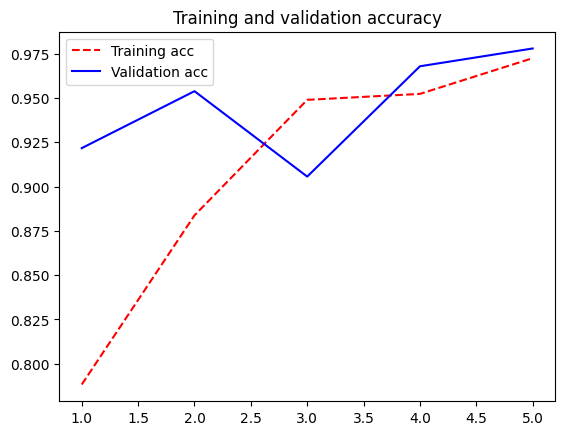

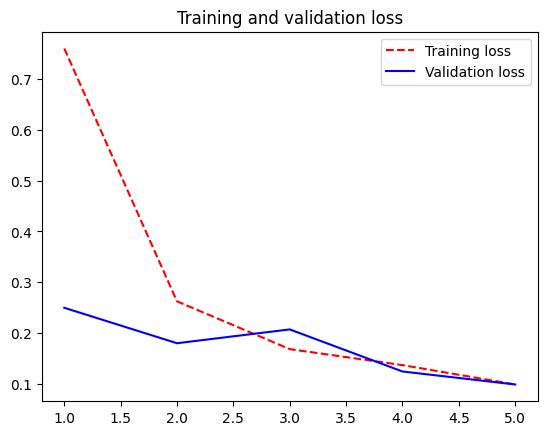

In [21]:
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

In [22]:
test_loss, test_acc = vgg.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)



16/16 [==============================] - 34s 2s/step - loss: 0.1297 - binary_accuracy: 0.9616
Accuracy: 0.9616161584854126
Loss:  0.12973639369010925


In [23]:
predictions = vgg.predict(test_generator)

In [25]:
print(len(predictions))

495


In [26]:
xtest, ytest = test_generator.next()

In [27]:
print(len(xtest))

32


In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [127]:
test_generator_for_performance = test_datagen.flow_from_directory(os.path.join(datapath, "test"), 
                                                             target_size = image_dims,
                                                              batch_size = 32,
                                                             class_mode = 'categorical', 
                                                             color_mode = 'rgb')

Found 495 images belonging to 2 classes.


In [128]:
xtest, ytest = next(test_generator_for_performance)
ypredict = vgg.predict(xtest)

In [131]:
# ytest[ytest >= 0.5] = 1.0
# ytest[ytest < 0.5] = 0.0
print(type(ytest))
print(type(ypredict))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [168]:
ypredict[ypredict >=0.7] = 1.0
ypredict[ypredict < 0.7] = 0.0

In [169]:
y_pred = np.empty(len(ypredict))
y_test = np.empty(len(ytest))
for i in range(0, len(ytest)):
    if (ytest[i, 0] == 0 and  ytest[i, 1] == 1) : y_test[i] = 0
    if (ytest[i, 0] == 1 and  ytest[i, 1] == 0) : y_test[i] = 1
    if (ypredict[i, 0] == 0 and  ypredict[i, 1] == 1) : y_pred[i] = 0
    if (ypredict[i, 0] == 1 and  ypredict[i, 1] == 0) : y_pred[i] = 1

In [170]:
for i in range(0, len(ytest)):
    print("test- {0} predict - {1}".format(ytest[i], ypredict[i]))

test- [1. 0.] predict - [1. 0.]
test- [0. 1.] predict - [0. 1.]
test- [0. 1.] predict - [0. 1.]
test- [0. 1.] predict - [0. 1.]
test- [1. 0.] predict - [1. 0.]
test- [1. 0.] predict - [1. 0.]
test- [0. 1.] predict - [0. 1.]
test- [0. 1.] predict - [0. 1.]
test- [0. 1.] predict - [0. 1.]
test- [0. 1.] predict - [0. 1.]
test- [1. 0.] predict - [1. 0.]
test- [1. 0.] predict - [1. 0.]
test- [0. 1.] predict - [0. 1.]
test- [0. 1.] predict - [0. 1.]
test- [1. 0.] predict - [1. 0.]
test- [0. 1.] predict - [0. 1.]
test- [0. 1.] predict - [0. 1.]
test- [1. 0.] predict - [1. 0.]
test- [0. 1.] predict - [0. 1.]
test- [1. 0.] predict - [1. 0.]
test- [1. 0.] predict - [1. 0.]
test- [1. 0.] predict - [1. 0.]
test- [0. 1.] predict - [0. 1.]
test- [0. 1.] predict - [0. 1.]
test- [1. 0.] predict - [1. 0.]
test- [0. 1.] predict - [0. 1.]
test- [0. 1.] predict - [0. 1.]
test- [1. 0.] predict - [1. 0.]
test- [0. 1.] predict - [0. 1.]
test- [1. 0.] predict - [1. 0.]
test- [0. 1.] predict - [0. 1.]
test- [1

In [171]:
for i in range(0, len(y_test)):
    print("test- {0} predict - {1}".format(y_test[i], y_pred[i]))

test- 1.0 predict - 1.0
test- 0.0 predict - 0.0
test- 0.0 predict - 0.0
test- 0.0 predict - 0.0
test- 1.0 predict - 1.0
test- 1.0 predict - 1.0
test- 0.0 predict - 0.0
test- 0.0 predict - 0.0
test- 0.0 predict - 0.0
test- 0.0 predict - 0.0
test- 1.0 predict - 1.0
test- 1.0 predict - 1.0
test- 0.0 predict - 0.0
test- 0.0 predict - 0.0
test- 1.0 predict - 1.0
test- 0.0 predict - 0.0
test- 0.0 predict - 0.0
test- 1.0 predict - 1.0
test- 0.0 predict - 0.0
test- 1.0 predict - 1.0
test- 1.0 predict - 1.0
test- 1.0 predict - 1.0
test- 0.0 predict - 0.0
test- 0.0 predict - 0.0
test- 1.0 predict - 1.0
test- 0.0 predict - 0.0
test- 0.0 predict - 0.0
test- 1.0 predict - 1.0
test- 0.0 predict - 0.0
test- 1.0 predict - 1.0
test- 0.0 predict - 0.0
test- 1.0 predict - 0.0


In [166]:
import pandas as pd
from sklearn.metrics import recall_score ,precision_score,accuracy_score, f1_score,roc_auc_score



In [172]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result


binary_classification_performance(y_test, y_pred)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.97,1.0,0.93,0.96,0.96,1.0,0.93,18,13,0,1
